# TP 2-1 - Pokemon : Seconde partie (Analyse)

### Modules necessaires :
*   PANDAS 0.24.2   => Permet la manipulation et l'analyse de données
*   NUMPY 1.16.3    => Permet la manipulation de tableaux et matrices
*   MATPLOTLIB 3.0.3
*   SEABORN 0.9.0


# Ce que nous allons découvrir et les prérequis
Dans la première partie du TP Pokémon, nous avons constitué un jeu d'observations qui va nous permettre d'entamer la démarche d'analyse et de recherche de solution à notre problème, à savoir déterminer le Pokémon à utiliser lors d'un combat dans le but de le gagner.

Nous allons commencer cette deuxième partie du TP par un peu de statistiques pour une meilleure compréhension des données. 

## Reprendre l'essentiel du code de la première partie du TP

#### - Importer `pandas`
#### - Désactiver le nombre maximum de colonnes à afficher d'un `DataFrame` (mettre l'option `display.max_columns` à `None`)
#### - Reprendre l'essentiel du code de la première partie du TP 

`#Reprise du code de la première partie
nosPokemons = pnd.read_csv("datas/pokedex.csv", sep=";")
nosPokemons['LEGENDAIRE'] = (nosPokemons['LEGENDAIRE']=='VRAI').astype(int)
nosPokemons['NOM'][62] = "Colosinge"
combats = pnd.read_csv("datas/combats.csv")
nbFoisPremierePosition = combats.groupby('First_pokemon').count()
nbFoisSecondePosition = combats.groupby('Second_pokemon').count()
nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition
nombreDeVictoires = combats.groupby('Winner').count()
listeAAgreger = combats.groupby('Winner').count()
listeAAgreger.sort_index()
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Winner + nbFoisSecondePosition.Winner
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.First_pokemon
listeAAgreger['POURCENTAGE_DE_VICTOIRES']= nombreDeVictoires.First_pokemon/(nbFoisPremierePosition.Winner + nbFoisSecondePosition.Winner)
nouveauPokedex = nosPokemons.merge(listeAAgreger, left_on='NUMERO', right_index = True, how='left')`

#### - Afficher `nouveauPokedex`

**Reponse**

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# desactivating maximum number of columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# loading previous data
df_newPokedex = pd.read_csv('./new_pokedex.csv', index_col=0)
df_newPokedex.head()

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,nb_wins,nb_combats,win_ratio
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37,133,0.278
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46,121,0.380
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89,132,0.674
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70,125,0.560
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,55,112,0.491


## Un peu de statistiques

Nous allons faire dans cette section un peu de statistiques sur notre jeu d'observations. 

### Description de notre jeu d'observations 

#### -  Faire dégager les caractéristiques intéressantes à l'aide de la fonction `describe()` du module `Pandas`, en se basant sur:  

- Le nombre de données (count)
- La moyenne (mean)
- L'écart type (Std pour Standard Deviation)
- Les valeurs minimales et maximales
- Les quartiles

#### - Quels sont les types de Pokémons qu'un dresseur doit posséder?

Afin de maximiser les chances de gagner, il faut que le dresseur de Pokémons dispose des principaux Pokémons du Pokédex dans sa collection. En ayant les Pokémons les plus fréquemment rencontrés, cela signifie que les adversaires ont de grandes chances de posséder les mêmes. Sachant que deux Pokémons de même type peuvent contrer les attaques, cela peut donc éviter de perdre le combat. 

- Tracer deux graphiques qui nous permettra de visualiser le nombre des pokémons en fonction de leur type (`TYPE_1` et `TYPE_2`). Cela nous aidera à identifier les Pokémons indispensables à tout dresseur. 

>Importer `matplotlib` et `seaborn`, nécessaires à la représentation graphique des données.

**Reponse**

In [6]:
df_newPokedex.describe()

,NUMERO,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,nb_wins,nb_combats,win_ratio
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,62.500000,124.831250,0.501536
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,33.852141,21.584372,0.254986
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,0.000000,0.000000,0.022000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,34.750000,120.000000,0.284500
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,61.000000,127.000000,0.491000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,90.000000,135.000000,0.717500
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,152.000000,164.000000,0.984000


<Axes: xlabel='TYPE_2', ylabel='count'>

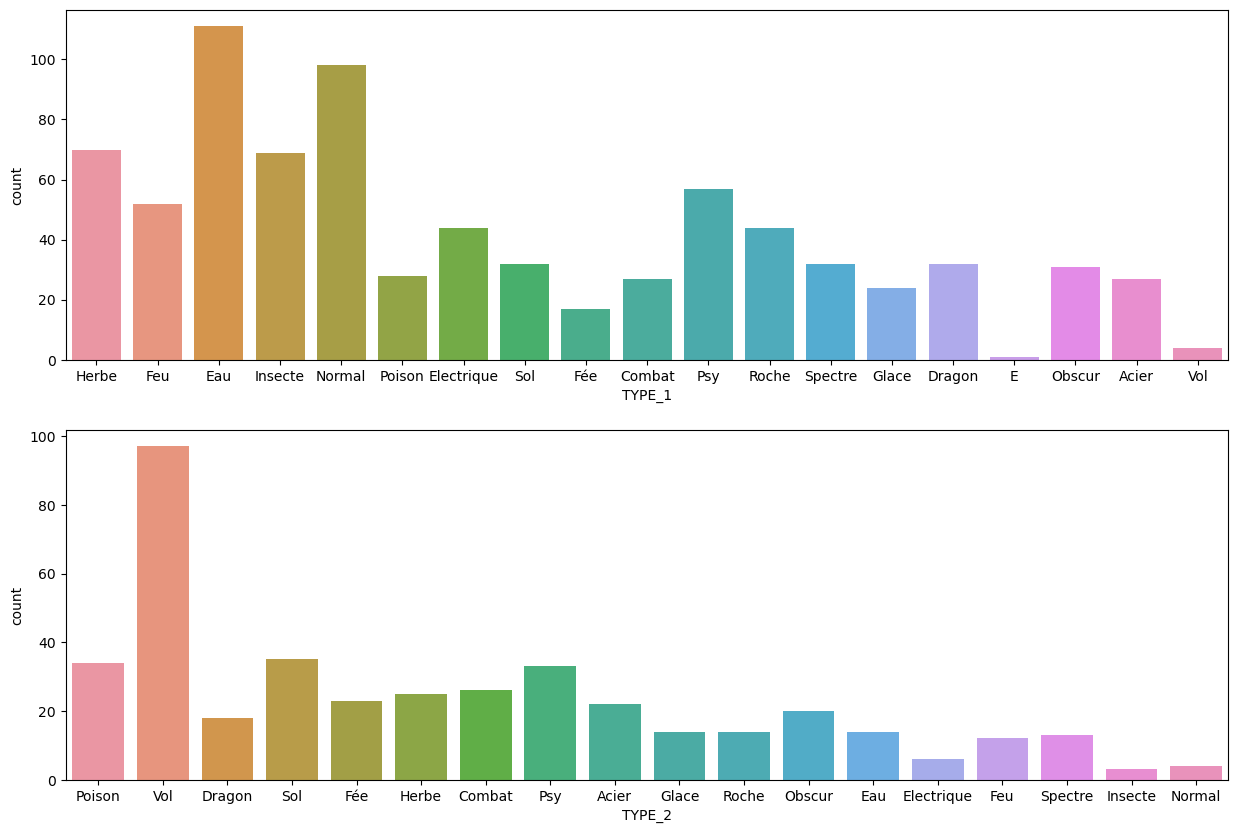

In [17]:
# ploting pokemon
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
sns.countplot(x='TYPE_1', data=df_newPokedex, ax=axs[0])
sns.countplot(x='TYPE_2', data=df_newPokedex, ax=axs[1])


## Les types de Pokémons gagnants et perdants

Il est important de connaître les types de Pokémons gagnants. En effet, en s'assurant de les avoir dans sa collection et de les utiliser dans les combats, le dresseur a de fortes chances de gagner.

#### - Calculer la moyenne des pourcentages de victoires de chaque Pokémon. Grouper cette moyenne par type de Pokémon et la trier par ordre croissant.

#### -  Qu'est ce qu'on peut déduire sur les Pokémons gagants?

#### - Quels sont les types de Pokémons qui perdent le plus souvent leur combat? 

#### - Peut-on déjà en déduire quelque chose? 

#### - Trouver une corrélation entre les données
- Quelles sont les features qui ont un impact sur le fait de gagner ou non un combat? Quelles sont celles qui n'ont pas pas d'impact? (Il s'agit de déterminer l'existence de features ayant un lien fort avec la capacité à gagner un combat)
    
- Utiliser un graphique (appelé `HeatMap`) pour visualiser la corrélation entre les féatures:
    * 1) Calcul de la corrélation des différentes features
    * 2) Création du graphique à partir de la corrélation calculée


#### - D'après le graphique (`HeatMap`), qu'est-ce qu'on peut constater concernant la feature `TYPE_1`? 

#### - Comment lire ce graphique?

#### - Comment interpréter la valeur 1?

#### - Que peut-on constater concernant le pourcentage des victoires? Que peut-on déduire?

#### - Que peut-on constater concernant l'impact que peut avoir la feature `LEGENDAIRE` sur la possibilité de gagner un combat? 

#### - Sauvegarder de dataframe `nouveauPokedex` dans un fichier `csv` (`dataset.csv`)

**Reponse**

In [32]:
# The average win ration for each type
win_avg_type1=df_newPokedex.groupby('TYPE_1')['win_ratio'].mean().sort_values(ascending=True)
win_avg_type2=df_newPokedex.groupby('TYPE_2')['win_ratio'].mean().sort_values(ascending=True)
win_avg_type1

TYPE_1
Fée           0.329176
E             0.344000
Roche         0.404818
Acier         0.424481
Poison        0.433214
Insecte       0.439030
Glace         0.439625
Herbe         0.440403
Eau           0.470500
Combat        0.475654
Spectre       0.484097
Normal        0.535558
Sol           0.541452
Psy           0.545754
Feu           0.579231
Obscur        0.629800
Electrique    0.632814
Dragon        0.633645
Vol           0.765000
Name: win_ratio, dtype: float64

In [33]:
win_avg_type2

TYPE_2
Roche         0.306538
Sol           0.376371
Eau           0.412000
Herbe         0.420292
Fée           0.432045
Insecte       0.439000
Spectre       0.440750
Poison        0.452250
Acier         0.500905
Psy           0.509938
Electrique    0.532500
Glace         0.587429
Obscur        0.594750
Dragon        0.605944
Feu           0.633750
Normal        0.641000
Vol           0.663531
Combat        0.676808
Name: win_ratio, dtype: float64

In [47]:
# correlation
(df_newPokedex.corr())[['win_ratio']]

,win_ratio
NUMERO,0.059549
POINTS_DE_VIE,0.257960
POINTS_ATTAQUE,0.500185
POINTS_DEFFENCE,0.129460
POINTS_ATTAQUE_SPECIALE,0.478961
POINT_DEFENSE_SPECIALE,0.324202
POINTS_VITESSE,0.937732
NOMBRE_GENERATIONS,0.021064
LEGENDAIRE,0.325022
nb_wins,0.980868


In [53]:
features_corr_with_win = ((df_newPokedex.corr())[['win_ratio']].abs()>0.1).sort_values(by='win_ratio', ascending=False)

features_corr_with_win.loc[features_corr_with_win['win_ratio']==True]

,win_ratio
POINTS_DE_VIE,True
POINTS_ATTAQUE,True
POINTS_DEFFENCE,True
POINTS_ATTAQUE_SPECIALE,True
POINT_DEFENSE_SPECIALE,True
POINTS_VITESSE,True
LEGENDAIRE,True
nb_wins,True
win_ratio,True


<Axes: >

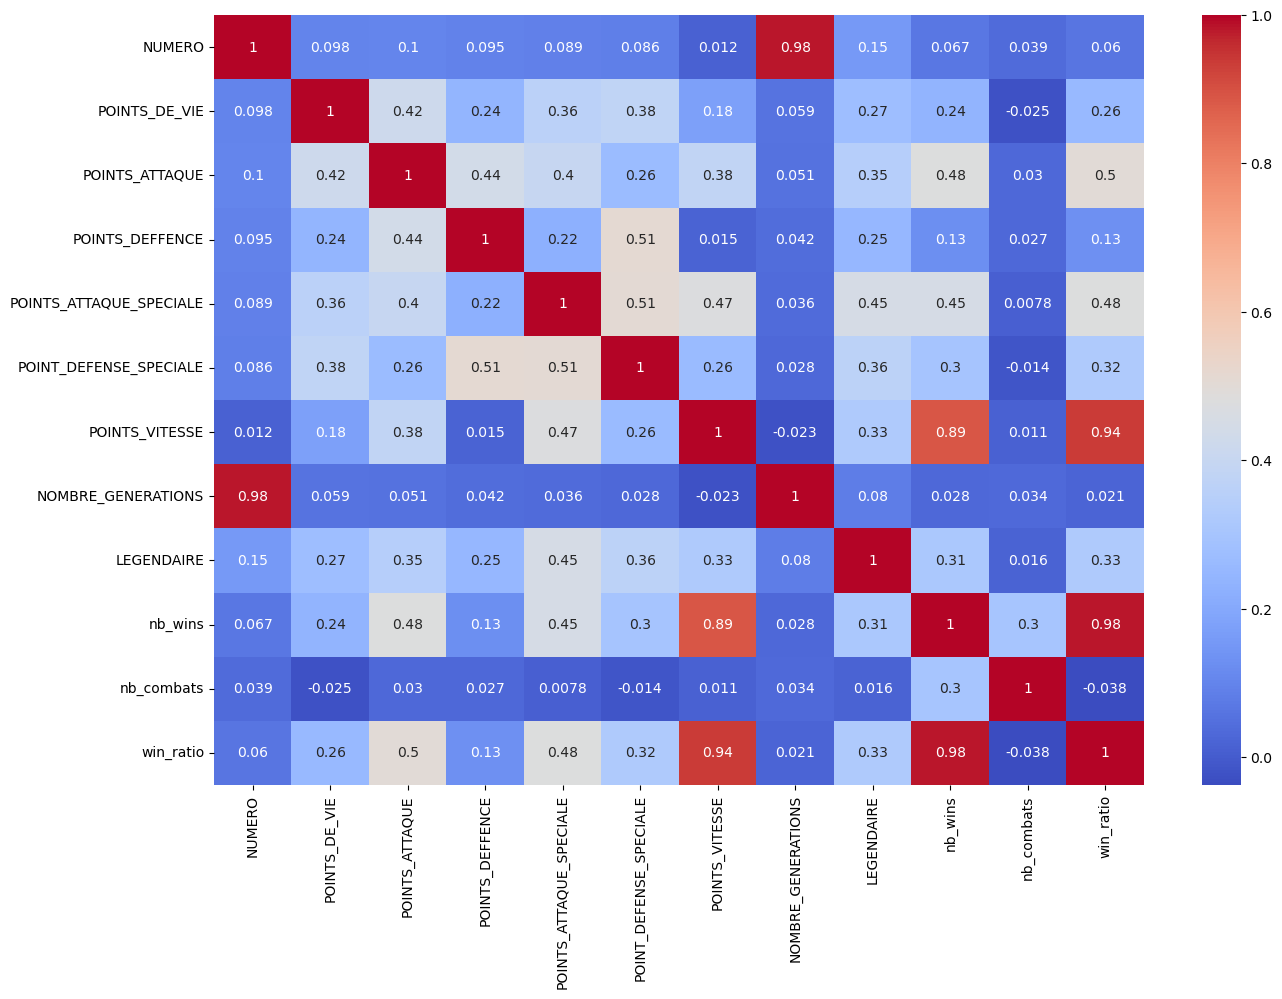

In [75]:
# heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_newPokedex.corr(), annot=True, cmap='coolwarm')

In [78]:
# pour le type 1 n'est pas un type numeric
df_encoded = pd.get_dummies(df_newPokedex[['win_ratio','TYPE_1']], columns=['TYPE_1'], drop_first=True)
df_encoded.head()


,win_ratio,TYPE_1_Combat,TYPE_1_Dragon,TYPE_1_E,TYPE_1_Eau,TYPE_1_Electrique,TYPE_1_Feu,TYPE_1_Fée,TYPE_1_Glace,TYPE_1_Herbe,TYPE_1_Insecte,TYPE_1_Normal,TYPE_1_Obscur,TYPE_1_Poison,TYPE_1_Psy,TYPE_1_Roche,TYPE_1_Sol,TYPE_1_Spectre,TYPE_1_Vol
0,0.278,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.380,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.674,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.560,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.491,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
df_newPokedex_corr = df_encoded.corr()
df_newPokedex_corr

,win_ratio,TYPE_1_Combat,TYPE_1_Dragon,TYPE_1_E,TYPE_1_Eau,TYPE_1_Electrique,TYPE_1_Feu,TYPE_1_Fée,TYPE_1_Glace,TYPE_1_Herbe,TYPE_1_Insecte,TYPE_1_Normal,TYPE_1_Obscur,TYPE_1_Poison,TYPE_1_Psy,TYPE_1_Roche,TYPE_1_Sol,TYPE_1_Spectre,TYPE_1_Vol
win_ratio,1.000000,-0.018824,0.105260,-0.022107,-0.048718,0.124185,0.081319,-0.100765,-0.043203,-0.073387,-0.075036,0.049611,0.100468,-0.051633,0.048622,-0.092613,0.031803,-0.013895,0.074087
TYPE_1_Combat,-0.018824,1.000000,-0.038149,-0.006612,-0.075014,-0.045088,-0.049277,-0.027538,-0.032868,-0.057873,-0.057419,-0.069829,-0.037524,-0.035593,-0.051765,-0.045088,-0.038149,-0.038149,-0.013248
TYPE_1_Dragon,0.105260,-0.038149,1.000000,-0.007221,-0.081931,-0.049245,-0.053820,-0.030077,-0.035898,-0.063209,-0.062713,-0.076267,-0.040984,-0.038874,-0.056538,-0.049245,-0.041667,-0.041667,-0.014470
TYPE_1_E,-0.022107,-0.006612,-0.007221,1.000000,-0.014200,-0.008535,-0.009328,-0.005213,-0.006222,-0.010955,-0.010869,-0.013218,-0.007103,-0.006737,-0.009799,-0.008535,-0.007221,-0.007221,-0.002508
TYPE_1_Eau,-0.048718,-0.075014,-0.081931,-0.014200,1.000000,-0.096832,-0.105829,-0.059142,-0.070587,-0.124291,-0.123316,-0.149967,-0.080588,-0.076440,-0.111172,-0.096832,-0.081931,-0.081931,-0.028453
TYPE_1_Electrique,0.124185,-0.045088,-0.049245,-0.008535,-0.096832,1.000000,-0.063609,-0.035547,-0.042427,-0.074706,-0.074119,-0.090138,-0.048438,-0.045945,-0.066820,-0.058201,-0.049245,-0.049245,-0.017102
TYPE_1_Feu,0.081319,-0.049277,-0.053820,-0.009328,-0.105829,-0.063609,1.000000,-0.038850,-0.046369,-0.081647,-0.081006,-0.098513,-0.052938,-0.050214,-0.073029,-0.063609,-0.053820,-0.053820,-0.018691
TYPE_1_Fée,-0.100765,-0.027538,-0.030077,-0.005213,-0.059142,-0.035547,-0.038850,1.000000,-0.025913,-0.045628,-0.045270,-0.055054,-0.029584,-0.028062,-0.040812,-0.035547,-0.030077,-0.030077,-0.010445
TYPE_1_Glace,-0.043203,-0.032868,-0.035898,-0.006222,-0.070587,-0.042427,-0.046369,-0.025913,1.000000,-0.054458,-0.054031,-0.065708,-0.035310,-0.033492,-0.048710,-0.042427,-0.035898,-0.035898,-0.012467
TYPE_1_Herbe,-0.073387,-0.057873,-0.063209,-0.010955,-0.124291,-0.074706,-0.081647,-0.045628,-0.054458,1.000000,-0.095138,-0.115700,-0.062173,-0.058974,-0.085769,-0.074706,-0.063209,-0.063209,-0.021951


<Axes: >

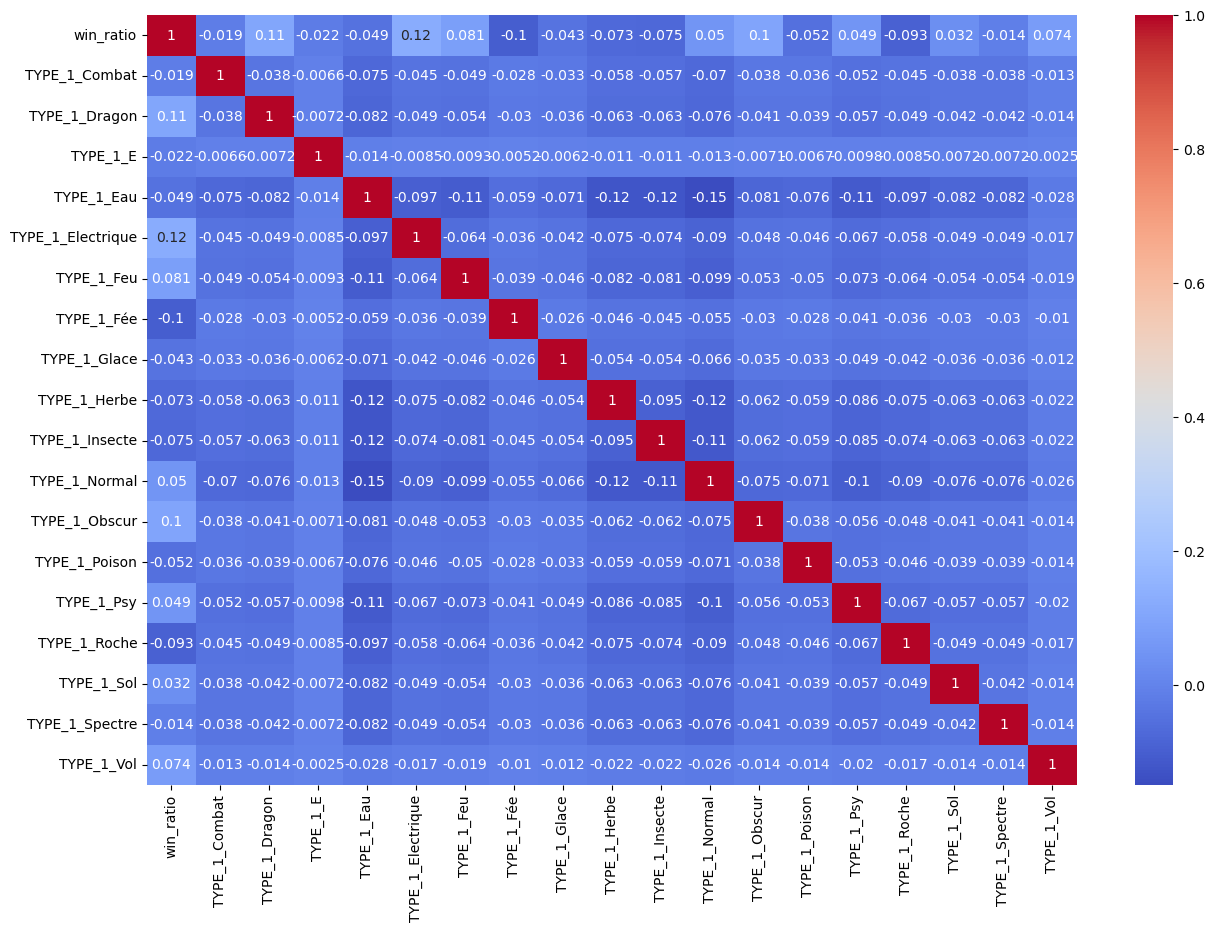

In [81]:
# heat map for type1
plt.figure(figsize=(15, 10))
sns.heatmap(df_newPokedex_corr, annot=True, cmap='coolwarm')

1- D'apres le heat map le feature TYPE_1 a une correlation entre 12\% et -10\% avec le taux de gangne

2- Pour lire le graphique la $i^{eme}$ ligne et $j^{eme}$ colone indique la correlation entre le $i^{eme}$ et $j^{eme}$ featrue , est la couleur de la case facilite la lecture en suivant la case

3- La valuer 1 indique que les features sont lieairement dependants f1 = f2

4- le pourcentage de victoire a une faible correlation avec le nombre de combat donc il peut etre non significatif pour quelques pokemon 

5- Le feature LEGENDAIRE a une correlation de 33% avec le pourcentage de victoire